In [55]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

In [2]:
#Основная функция
def f(x):
    return math.exp(x)

In [44]:
a = -1.4
b = 0.3
h = 0.17
n = 10
#h = (b-a)/n

In [49]:
# Функция для генерации диапазона значений
def frange(start, stop, step):
    x = start
    while x <= stop + 1e-9:  # чтобы включить верхнюю границу
        yield x
        x += step

In [50]:
# Задаём узлы на отрезке [-1.4, 0.3]
x_vals = [round(i, 3) for i in frange(-1.4, 0.3, h)]
y_vals = [f(x) for x in x_vals]

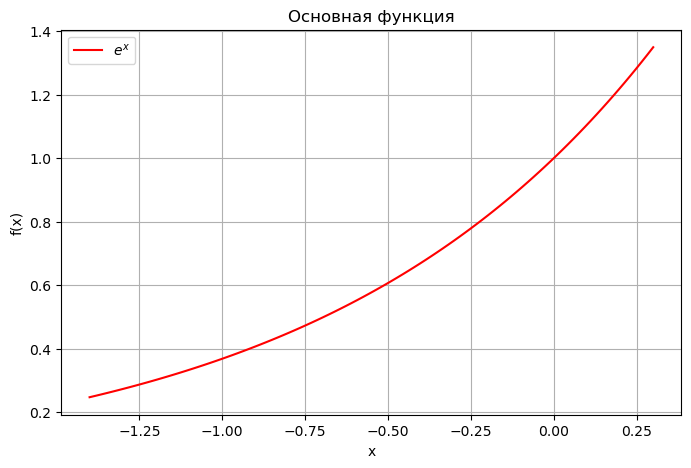

In [60]:
plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_plot, 'r-', label=r'$e^x$')  # График функции
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Основная функция')
plt.legend()
plt.grid()
plt.show()

In [45]:
#Вычисление аналитически
I, err = quad(f, a, b)
print(I)

1.1032618436343966


1.0121403302798189


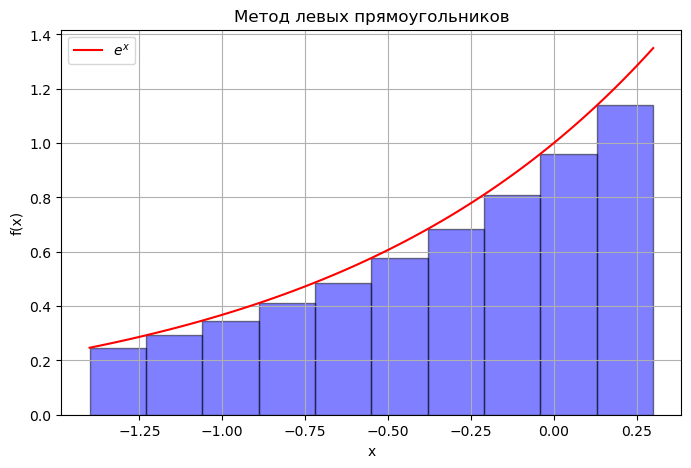

In [65]:
#Вычисление левыми прямоугольниками
s = 0
x_values = []
y_values = []

for i in range(0, n):
    x_i = a + i * h
    y_i = f(x_i)
    s += y_i * h
    x_values.append(x_i)
    y_values.append(y_i)
print(s)

# График
x_plot = np.linspace(a, b, 100)
y_plot = [f(x) for x in x_plot]

plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_plot, 'r-', label=r'$e^x$')  # График функции

# Добавление прямоугольников
for i in range(n):
    x_i = x_values[i]
    y_i = y_values[i]
    plt.bar(x_i, y_i, width=h, align='edge', color='blue', alpha=0.5, edgecolor='black')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Метод левых прямоугольников')
plt.legend()
plt.grid()

# Отображение графика
plt.show()

In [78]:
# Вычисление погрешностей для левых прямоугольников

# Первая производная функции f(x) = e^x
def f_prime(x):
    return math.exp(x)  # Первая производная e^x

# Максимум первой производной на [a, b]
max_f_prime = max(f_prime(a), f_prime(b))

# Вычисление погрешности
Err_left_right = (max_f_prime * (b - a)**2) / (2 * n)
Err_left_right

0.19505459769473243

1.1996948436976662


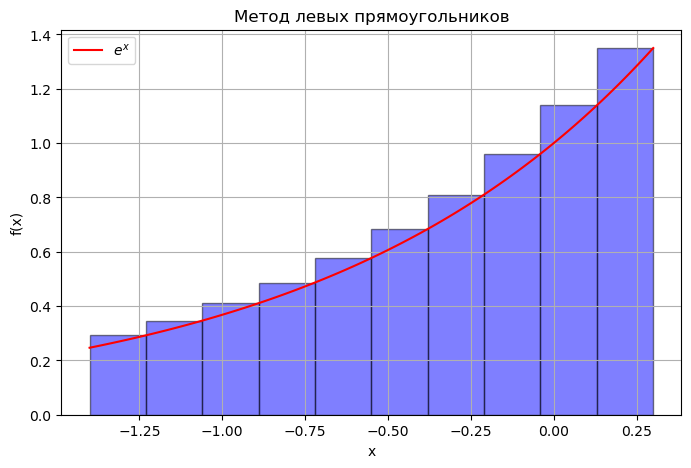

In [66]:
#Вычисление правыми прямоугольниками
s = 0
x_values = []
y_values = []

for i in range(1, n+1):
    x_i = a+(i*h)
    y_i = f(x_i)
    s += y_i * h
    x_values.append(x_i)
    y_values.append(y_i)
print(s)

# График
x_plot = np.linspace(a, b, 100)
y_plot = [f(x) for x in x_plot]

plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_plot, 'r-', label=r'$e^x$')  # График функции

# Добавление прямоугольников
for i in range(n):
    x_i = x_values[i]
    y_i = y_values[i]
    plt.bar(x_i, y_i, width=-h, align='edge', color='blue', alpha=0.5, edgecolor='black')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Метод левых прямоугольников')
plt.legend()
plt.grid()

# Отображение графика
plt.show()

In [79]:
# Вычисление погрешностей для правых прямоугольников

# Первая производная функции f(x) = e^x
def f_prime(x):
    return math.exp(x)  # Первая производная e^x

# Максимум первой производной на [a, b]
max_f_prime = max(f_prime(a), f_prime(b))

# Вычисление погрешности
Err_left_right = (max_f_prime * (b - a)**2) / (2 * n)
Err_left_right

0.19505459769473243

In [48]:
#Вычисление средними прямоугольниками
s = 0
for i in range(0, n):
    s += (f(a+((i+0.5)*h)))*h
s

1.1019344514693927

1.1019344514693927


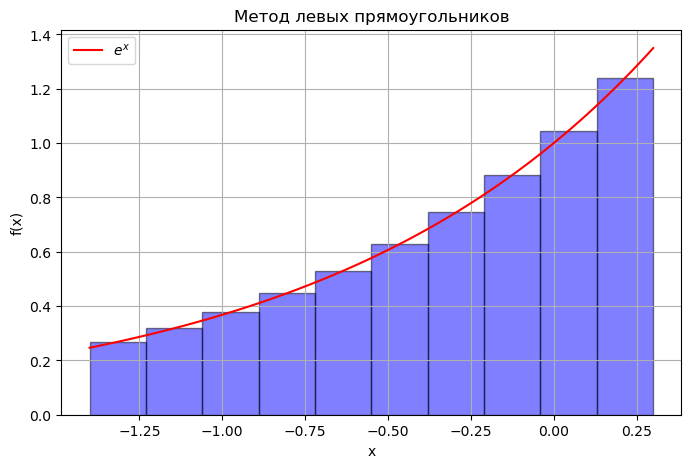

In [77]:
#Вычисление средними прямоугольниками
s = 0
x_values = []
y_values = []

for i in range(0, n):
    x_i = a+((i+0.5)*h)
    y_i = f(x_i)
    s += y_i * h
    x_values.append(x_i)
    y_values.append(y_i)
print(s)

# График
x_plot = np.linspace(a, b, 100)
y_plot = [f(x) for x in x_plot]

plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_plot, 'r-', label=r'$e^x$')  # График функции

# Добавление прямоугольников
for i in range(n):
    x_i = x_values[i]
    y_i = y_values[i]
    plt.bar(x_i-h/2, y_i, width=h, align='edge', color='blue', alpha=0.5, edgecolor='black')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Метод левых прямоугольников')
plt.legend()
plt.grid()

# Отображение графика
plt.show()

In [ ]:
# Вычисление погрешностей для методов прямоугольников

# Первая и вторая производные функции f(x) = e^x
def f_prime(x):
    return math.exp(x)  # Первая производная e^x

def f_double_prime(x):
    return math.exp(x)  # Вторая производная e^x

# Максимумы первой и второй производных на [a, b]
max_f_prime = max(f_prime(a), f_prime(b))
max_f_double_prime = max(f_double_prime(a), f_double_prime(b))

# Вычисление погрешностей
Err_left_right = (max_f_prime * (b - a)**2) / (2 * n)  # Погрешность левых и правых прямоугольников
Err_mid = (max_f_double_prime * (b - a)**3) / (24 * n**2)  # Погрешность средних прямоугольников

# Вывод значений погрешностей
Err_left_right, Err_mid